In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.fftpack as spfft
import scipy.signal as spsig
from scipy.io import wavfile

In [25]:
file_path = './3.png'
img = mpimg.imread(file_path)
img_h = img.shape[0]
img_w = img.shape[1]
img_c = img.shape[2]

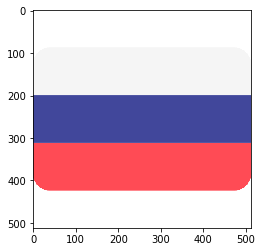

In [26]:
plt.imshow(img)
plt.show()

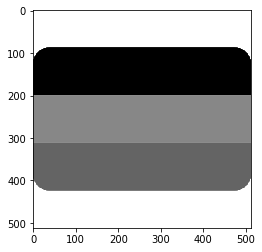

In [27]:
img_sum = np.sum(img, axis=2)
img_sum = img_sum / np.max(img_sum)
plt.imshow(img_sum, cmap='Greys')
plt.show()

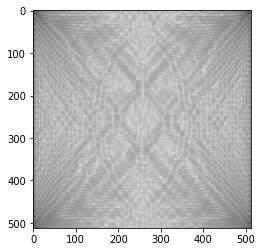

In [28]:
img_fft = np.fft.fft2(img_sum)

# normalize for istft
img_fft_abs = np.abs(img_fft)
img_fft_pha = np.angle(img_fft)
img_fft_abs = img_fft_abs / img_h
img_fft_norm = img_fft_abs * np.exp(1j * img_fft_pha)

img_fft_m = 20 * np.log10(np.abs(img_fft_norm))  
plt.imshow(img_fft_m, cmap='Greys')

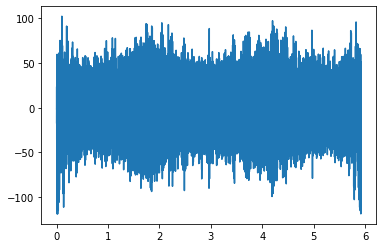

In [29]:
fs = 44100
window = 'blackmanharris'
img_signal = spsig.istft(np.log10(img_fft_norm), fs=fs, window=window)
plt.plot(img_signal[0], img_signal[1])
plt.show()

In [30]:
img_signal_16 = np.int16(img_signal[1] * 600)
wavfile.write('./1.wav', fs, img_signal_16)